# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
# Imports
import sklearn
import pandas as pd
import numpy as np
import random
import re
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer

Import project files

In [3]:
from utils import nlp_utils

Uploading data

In [4]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [5]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 43.6 ms


Replacing words in df

In [6]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])

CPU times: total: 22.3 s
Wall time: 24.1 s


Clustering

In [8]:
%%time
embedded_dict = nlp_utils.embed_corpus(df['txt'])
cluster_dict, dbscan = nlp_utils.run_clustering(embedded_dict)

CPU times: total: 4.09 s
Wall time: 4.18 s


Plotting tSNE

c:\Users\user\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


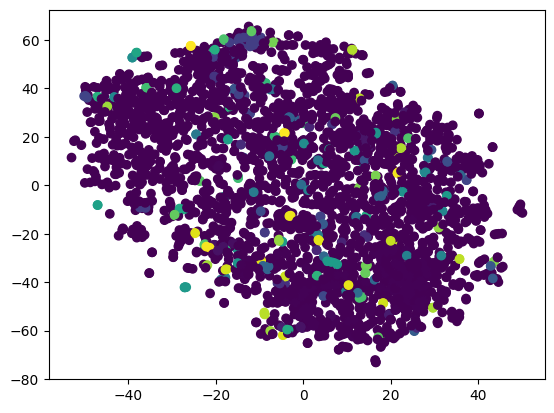

CPU times: total: 1min 34s
Wall time: 33.1 s


In [9]:
%%time
nlp_utils.plot_tsne(embedded_dict, dbscan)

Plotting Jaccard index histogram

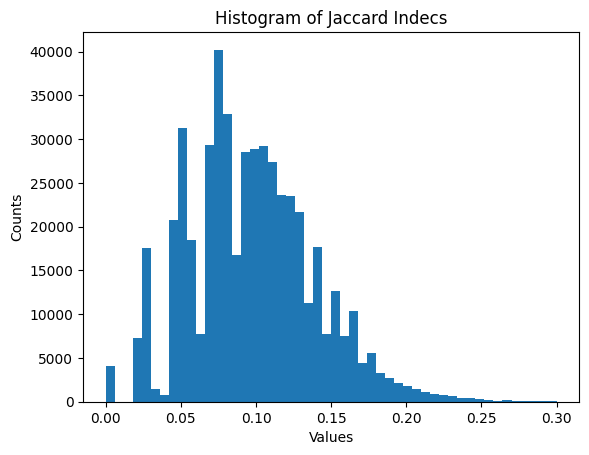

CPU times: total: 13 s
Wall time: 22.2 s


In [11]:
%%time
nlp_utils.plot_jaccard_hist(df)

In [16]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, word_dict)

Starting average Jaccard index: 0.22009270472362563
	replacing ['jacket', 'hats', 'pair', 'shoe', 'shoes', 'shirts', 'boots'] in socks
	replacing ['looked', 'looks'] in turned
	replacing ['tolkien', 'bradbury'] in gaiman
	replacing ['wash', 'clean'] in dry
	replacing ['hands', 'ears', 'ear', 'tongue', 'bottom', 'tear'] in eye
	replacing ['friend', 'dad', 'mom'] in sister
	replacing ['added', 'selection', 'limited', 'purchase', 'reviews', 'feature', 'cards', 'includes', 'package'] in features
	replacing ['configuration', 'installation'] in automation
	replacing ['example', 'age', 'aspect', 'influence', 'perspective'] in common
	replacing ['laugh', 'cry'] in hear
	replacing ['child', 'mother'] in father
	replacing ['story', 'part'] in secret
	replacing ['box', 'pack'] in bag
	replacing ['favorite', 'favourite'] in fave
	replacing ['thanks', 'thank'] in welcome
	replacing ['adventure', 'adventures'] in journey
	replacing ['fabulous', 'fab', 'lovely'] in gorgeous
	replacing ['keeps', 'stop

Traceback (most recent call last):
  File "c:\Users\user\miniconda3\lib\site-packages\IPython\core\magics\execution.py", line 1316, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "c:\Users\user\Documents\Y-data\INTUIT-Project\git\utils\nlp_utils.py", line 342, in replace_words_in_df
    for word in words:
  File "c:\Users\user\Documents\Y-data\INTUIT-Project\git\utils\nlp_utils.py", line 251, in get_average_jaccard
    cc = clean_corpus(corpus)
  File "c:\Users\user\Documents\Y-data\INTUIT-Project\git\utils\nlp_utils.py", line 57, in jaccard_index
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\user\miniconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    

In [ ]:
df_2

NameError: name 'df_2' is not defined

Looking at the histogram again

In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
